## Dynamics

Dynamics | $\partial_{\tau}x_i=$ |
| :--------: | :-------: |
Biochemical | $F -B x_i - R \sum_j A_{ij} x_i x_j$ |
Epidemics | $-B x_i + R \sum_j A_{ij} (1-x_i)x_j$ |
Population | $-B x_i^{b} + R \sum_j A_{ij} x_j^a$ |
Synchronization | $\omega_i + R \sum_j A_{ij} \sin(x_j-x_i)$ |

In [1]:
%load_ext autoreload
%autoreload 2

## Importing

In [2]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

In [3]:
from utils.utils import *
import optuna
from optuna.storages import JournalStorage
from optuna.storages.journal import JournalFileBackend
from experiments.experiments_gkan import ExperimentsGKAN
from experiments.experiments_mpnn import ExperimentsMPNN
from experiments.experiments_llc import ExperimentsLLC
from train_and_eval import eval_model
import sympytorch

storage = JournalStorage(JournalFileBackend("optuna_journal_storage.log"))

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
import random
# import torch
# import numpy as np

def set_pytorch_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    torch.use_deterministic_algorithms(True)
set_pytorch_seed(0)

In [ ]:
# config = load_config("./configs/config_pred_deriv/config_real_epid_mpnn.yml")
# config['patience'] = 450
# exp = ExperimentsMPNN(
#     config=config,
#     n_trials=3,
#     study_name="test_mult_2"
# )

In [6]:
# exp.run()

In [ ]:
# config = load_config("./configs/config_pred_deriv/config_ic1/config_population.yml")
# # # config['t_span'] = [0, 1]
# exp = ExperimentsGKAN(
#     config=config,
#     n_trials=1,
#     study_name="test_mult_11"
# )

In [55]:
# exp.run()

[I 2025-07-22 13:05:55,302] A new study created in Journal with name: model-population-gkan-test_mult_11


Trial 0: num params: 348


[I 2025-07-22 13:20:07,691] Trial 0 finished with value: 9.843736188486218e-05 and parameters: {'lr': 0.0028057582076672534, 'lamb': 1.0, 'batch_size': 16, 'use_orig_reg': True, 'lamb_g_net': 8.63200816860254e-06, 'lamb_h_net': 8.629132190071855e-06, 'grid_size_g_net': 5, 'spline_order_g_net': 3, 'range_limit_g_net': 7, 'mu_1_g_net': 0.8, 'mu_2_g_net': 0.1, 'hidden_dim_g_net': 6, 'grid_size_h_net': 18, 'spline_order_h_net': 1, 'range_limit_h_net': 2, 'mu_1_h_net': 0.2, 'mu_2_h_net': 0.4, 'hidden_dim_h_net': 4}. Best is trial 0 with value: 9.843736188486218e-05.


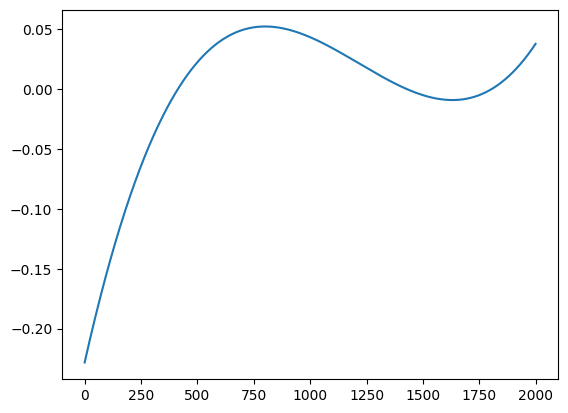

In [ ]:
# data = exp.training_set.raw_data_sampled[0].detach().cpu().numpy()
# plt.plot(data[:, 30, :])

In [9]:
# exp.training_set[0].y

In [10]:
# exp.epochs = 10
# exp.run()

In [11]:
# config_pop = load_config("./configs/config_pred_deriv/config_ic1/config_population_mpnn.yml")
# # config_pop["t_eval_steps"] = 1000
# # config_pop["t_span"] = [0, 10]

# exp = ExperimentsMPNN(
#     config=config_pop,
#     n_trials=1,
#     study_name='test_mult_3'
# )

In [12]:
# data = exp.training_set.raw_data_sampled[0].detach().cpu().numpy()
# plt.plot(data[:, 6, :])

In [13]:
# exp.training_set.raw_data_sampled.min()

In [14]:
# exp.epochs = 10
# exp.run()

In [6]:
config = load_config("./configs/config_pred_deriv/config_ic1/config_biochemical_llc.yml")

exp = ExperimentsLLC(
    config=config,
    n_trials=3,
    study_name="test_3",
    process_id=0
)

exp.run()

[I 2025-07-26 00:04:06,795] A new study created in Journal with name: model-biochemical-llc-test_3


Trial 0: num params: 4644


[I 2025-07-26 00:04:18,168] Trial 0 finished with value: 0.009816302917897701 and parameters: {'lr': 0.0028057582076672534, 'lamb': 0.009600000000000001, 'batch_size': 16, 'n_hidden_layers_g0': 1, 'hidden_dims_g0': 8, 'af_g0': 'relu', 'drop_p_g0': 0.00011916299962955152, 'n_hidden_layers_g1': 2, 'hidden_dims_g1': 56, 'af_g1': 'relu', 'drop_p_g1': 0.00133469775741781, 'n_hidden_layers_g2': 2, 'hidden_dims_g2': 32, 'af_g2': 'softplus', 'drop_p_g2': 0.0012040216379191721, 'n_hidden_layers_h_net': 1, 'hidden_dims_h_net': 32, 'af_h_net': 'relu', 'drop_p_h_net': 0.015535445807588463}. Best is trial 0 with value: 0.009816302917897701.


Trial 1: num params: 7988


[I 2025-07-26 00:04:22,121] Trial 1 finished with value: 0.037803955376148224 and parameters: {'lr': 0.0006192568649430464, 'lamb': 0.0061, 'batch_size': 64, 'n_hidden_layers_g0': 2, 'hidden_dims_g0': 56, 'af_g0': 'tanh', 'drop_p_g0': 0.00424727979536972, 'n_hidden_layers_g1': 1, 'hidden_dims_g1': 32, 'af_g1': 'softplus', 'drop_p_g1': 0.028226046783939623, 'n_hidden_layers_g2': 1, 'hidden_dims_g2': 40, 'af_g2': 'tanh', 'drop_p_g2': 0.0736534446668837, 'n_hidden_layers_h_net': 2, 'hidden_dims_h_net': 64, 'af_h_net': 'softplus', 'drop_p_h_net': 0.0005308046630775948}. Best is trial 0 with value: 0.009816302917897701.


Trial 2: num params: 7492


[I 2025-07-26 00:04:26,278] Trial 2 finished with value: 0.03039173036813736 and parameters: {'lr': 0.0006157785861833009, 'lamb': 0.0032, 'batch_size': 64, 'n_hidden_layers_g0': 1, 'hidden_dims_g0': 24, 'af_g0': 'tanh', 'drop_p_g0': 0.00018869508789698286, 'n_hidden_layers_g1': 2, 'hidden_dims_g1': 56, 'af_g1': 'tanh', 'drop_p_g1': 0.04117599592262882, 'n_hidden_layers_g2': 2, 'hidden_dims_g2': 56, 'af_g2': 'softplus', 'drop_p_g2': 0.15580940996926476, 'n_hidden_layers_h_net': 2, 'hidden_dims_h_net': 24, 'af_h_net': 'tanh', 'drop_p_h_net': 0.04997943803580264}. Best is trial 0 with value: 0.009816302917897701.


## Utils

In [5]:
from models.utils.MPNN import MPNN
from models.baseline.MPNN_ODE import MPNN_ODE
from train_and_eval import eval_model
from datasets.SyntheticData import SyntheticData
from sympy import symbols, sin, summation, simplify
import networkx as nx
from torch_geometric.utils import from_networkx
from utils.utils import integrate
from torch_geometric.data import Data
from models.kan.KAN import KAN
from models.GKAN_ODE import GKAN_ODE
import torch
import numpy as np
import itertools

import optuna

import warnings
warnings.filterwarnings("ignore")

from sympy import latex
from torch.utils.data import DataLoader

def get_model(g, h, message_passing=True, include_time=False, atol=1e-5, rtol=1e-5, integration_method = 'scipy_solver',
              eval=True, options = {}, all_t = False):
    conv = MPNN(
        g_net = g,
        h_net = h,
        message_passing=message_passing,
        include_time=include_time
    )

    symb = MPNN_ODE(
        conv=conv,
        model_path="./saved_models_optuna/tmp_symb",
        adjoint=True,
        integration_method=integration_method,
        atol=atol,
        rtol=rtol,
        options = options,
        all_t=all_t
    )

    if eval:
        symb = symb.eval()
    return symb


def make_callable(expr):
    free_syms = expr.free_symbols
    if not free_syms:
        # Expression is constant
        const_value = float(expr)
        return lambda x: torch.full((x.shape[0], 1), const_value, dtype=x.dtype, device=x.device)

    sym_module = sympytorch.SymPyModule(expressions=[expr])
    syms = {str(s) for s in free_syms}
    if {'x_i', 'x_j'} <= syms:
        return lambda x: sym_module(x_i=x[:, 0], x_j=x[:, 1])
    elif 'x_i' in syms:
        return lambda x: sym_module(x_i=x[:, 0])
    elif 'x_j' in syms:
        return lambda x: sym_module(x_j=x[:, 1])
    else:
        raise ValueError(f"Unexpected symbols in expression: {free_syms}")


def get_symb_test_error(g_symb, h_symb, test_set, message_passing=False, include_time=False, atol=1e-5, rtol=1e-5, scaler = None, inverse_scale=False, method='scipy_solver',
                        is_symb = True):

    if is_symb:
        if isinstance(g_symb, int):
            g_symb = sp.sympify(g_symb)

        if isinstance(h_symb, int):
            h_symb = sp.sympify(h_symb)

        g_symb = make_callable(g_symb)
        h_symb = make_callable(h_symb)

    test_losses = []

    for ts in test_set:
        symb = get_model(
            g=g_symb,
            h=h_symb,
            message_passing=message_passing,
            include_time=include_time,
            atol=atol,
            rtol=rtol,
            integration_method=method
        )

        collate_fn = lambda samples_list: samples_list
        test_loader = DataLoader(ts, batch_size=len(ts), shuffle=True, collate_fn=collate_fn)

        test_loss = eval_model(
            model=symb,
            valid_loader=test_loader,
            criterion=torch.nn.L1Loss(),
            scaler=scaler,
            inverse_scale=inverse_scale,
            pred_deriv=False
        )

        test_losses.append(test_loss)

    return test_losses



def get_test_set(dynamics, device='cuda', input_range=(0, 1), t_span = (0, 1), **integration_kwargs):
    seeds = [12345, 67890, 111213]

    graphs = [
        nx.barabasi_albert_graph(70, 3, seed=seeds[0]),
        nx.watts_strogatz_graph(50, 6, 0.3, seed=seeds[1]),
        nx.erdos_renyi_graph(100, 0.05, seed=seeds[2])
    ]

    test_set = []
    for i, graph in enumerate(graphs):
        snapshots = integrate_test_set(
            graph=graph,
            dynamics=dynamics,
            seed=seeds[i],
            device=device,
            input_range=input_range,
            t_span=t_span,
            **integration_kwargs
        )
        test_set.append(snapshots)

    return test_set



def integrate_test_set(graph, dynamics, seed=12345, device='cuda', input_range = (0, 1), t_span = (0, 1), **integration_kwargs):
    # graph = nx.barabasi_albert_graph(100, 3, seed=seed)
    edge_index = from_networkx(graph).edge_index
    edge_index = edge_index.to(torch.device(device))
    rng = np.random.default_rng(seed=seed)

    data, t = integrate(
        input_range=input_range,
        t_span = t_span,
        t_eval_steps=1000,
        dynamics=dynamics,
        device=device,
        graph=graph,
        rng = rng,
        **integration_kwargs
    )

    snapshot = Data(
        x = data[0].unsqueeze(0),
        y = data[1:],
        edge_index=edge_index,
        edge_attr=None,
        t_span = t
    )

    return [snapshot]


def build_model_from_file(model_path, message_passing, include_time, method='dopri5', adjoint=False, atol=1e-5, rtol=1e-5,
                          compute_mult=True):
    best_params_file = f"{model_path}/best_params.json"
    best_state_path = f"{model_path}/gkan/state_dict.pth"

    with open(best_params_file, 'r') as f:
        best_hyperparams = json.load(f)

    # g_net
    g_net = KAN(
        layers_hidden=[2, best_hyperparams['hidden_dim_g_net'], 1],
        grid_size=best_hyperparams['grid_size_g_net'],
        spline_order=best_hyperparams['spline_order_g_net'],
        grid_range=[-best_hyperparams['range_limit_g_net'], best_hyperparams['range_limit_g_net']],
        mu_1=best_hyperparams['mu_1_g_net'],
        mu_2=best_hyperparams['mu_2_g_net'],
        device='cuda',
        compute_mult=compute_mult,
        store_act=True
    )

    time_dim = 1 if include_time else 0
    in_dim_h = 2 if message_passing else 1
    in_dim_h += time_dim

    # h_net
    h_net = KAN(
        layers_hidden=[in_dim_h, best_hyperparams['hidden_dim_h_net'], 1],
        grid_size=best_hyperparams['grid_size_h_net'],
        spline_order=best_hyperparams['spline_order_h_net'],
        grid_range=[-best_hyperparams['range_limit_h_net'], best_hyperparams['range_limit_h_net']],
        mu_1=best_hyperparams['mu_1_h_net'],
        mu_2=best_hyperparams['mu_2_h_net'],
        device='cuda',
        compute_mult=True,
        store_act=True
    )

    gkan = MPNN(
        h_net=h_net,
        g_net=g_net,
        message_passing=message_passing,
        include_time=include_time
    )

    model = GKAN_ODE(
        conv=gkan,
        model_path='./saved_models_optuna/tmp',
        lmbd_g=best_hyperparams['lamb_g_net'],
        lmbd_h=best_hyperparams['lamb_h_net'],
        integration_method=method,
        adjoint=adjoint,
        atol=atol,
        rtol=rtol
    )

    model = model.to(torch.device('cuda'))
    model.load_state_dict(torch.load(best_state_path, weights_only=False, map_location=torch.device('cuda')))

    return model


def valid_symb_model(
    config,
    model_path_gkan,
    device='cuda',
    atol=1e-5,
    rtol=1e-5,
    method='dopri5',
    black_box_fitting=True,
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    grid_orig = None
):
    
    seed = 9999
    graph = nx.barabasi_albert_graph(100, 3, seed=seed)

    # Prepare validation/test set
    valid_set = integrate_test_set(
        graph=graph,
        dynamics=config['name'],
        seed=seed,
        device=device,
        input_range=config['input_range'],
        t_span=(0, 1),
        **config['integration_kwargs']
    )

    # Helper to compute validation loss
    def evaluate_model(g_symb, h_symb, is_symb=True):
        errs = get_symb_test_error(
            g_symb=g_symb,
            h_symb=h_symb,
            test_set=[valid_set],
            message_passing=False,
            include_time=False,
            method=method,
            atol=atol,
            rtol=rtol,
            is_symb=is_symb
        )
        return errs[0]

    # Helper to fit model for current config
    def fit_single_model(param1, param2, param3=None, is_orig=False):
        if black_box_fitting:
            print(f"Fitting black-box model with {param1} and {param2} iterations")
            pysr_model = lambda: get_pysr_model(
                model_selection=param1, 
                n_iterations=param2,
                # parallelism="serial",
                # random_state = seed,
                # deterministic = True
            )
            _, g_symb, h_symb, _ = fit_black_box_from_kan(
                n_g_hidden_layers=n_g_hidden_layers,
                n_h_hidden_layers=n_h_hidden_layers,
                device=device,
                model_path=model_path_gkan,
                pysr_model=pysr_model,
                sample_size=sample_size,
                theta=-np.inf,
                message_passing=False,
                verbose=False
            )
        else:
            
            if not is_orig:
                print(f"Fitting symbolic model with {param1}, theta {param2} and cutting threshold {param3}")
                _, g_symb, h_symb, _ = fit_model(
                    n_g_hidden_layers=n_g_hidden_layers,
                    n_h_hidden_layers=n_h_hidden_layers,
                    model_path=model_path_gkan,
                    theta=param2,
                    message_passing=False,
                    include_time=False,
                    sample_size=sample_size,
                    sort_by=param1,
                    verbose=False,
                    cut_threshold=param3
                )
            else:
                print(f"Fitting symbolic model with {param1}, theta {param2} and ws {param3}")
                _, g_symb, h_symb, _ = fit_model(
                    n_g_hidden_layers=n_g_hidden_layers,
                    n_h_hidden_layers=n_h_hidden_layers,
                    model_path=model_path_gkan,
                    theta=param2,
                    message_passing=False,
                    include_time=False,
                    sample_size=sample_size,
                    verbose=False,
                    fit_orig=True,
                    a_range = param1,
                    b_range = param1,
                    weight_simple = param3
                )
        return g_symb, h_symb

    if black_box_fitting:
        param_grid = (["score", "accuracy"], [50, 100, 200])
        search_space = [(mod, val) for mod in param_grid[0] for val in param_grid[1]]
    else:
        if grid_orig == None:
            param_grid = (
                ["score", "log_loss"],       
                [0.01, 0.05, 0.1],           
                [0.1, 0.01, 0.001]    
            )
        else:
            param_grid = grid_orig
            
            
        search_space = list(itertools.product(*param_grid))

    valid_losses = []

    for params in search_space:
        g_symb, h_symb = fit_single_model(*params, grid_orig != None)
        try:
            loss = evaluate_model(g_symb, h_symb)
        except AssertionError:
            loss = 1e8
        if black_box_fitting:
            valid_losses.append({'model_selection': params[0], 'param': params[1], 'valid_loss': loss})
        elif grid_orig == None:
            valid_losses.append({'sort_by': params[0], 'theta': params[1], 'cut_threshold': params[2], 'valid_loss': loss})
        else:
            valid_losses.append({'grid_range': params[0], 'theta': params[1], "ws":params[2], 'valid_loss': loss})

    # Select best performing configuration
    best = min(valid_losses, key=lambda x: x['valid_loss'])

    # Final refit with best config
    print(f"Refitting best model with {best}")
    if black_box_fitting:
        gkan_symb, symb_g, symb_h, exec_time = fit_black_box_from_kan(
            model_path=model_path_gkan,
            n_g_hidden_layers=n_g_hidden_layers,
            n_h_hidden_layers=n_h_hidden_layers,
            device=device,
            theta=-np.inf,
            pysr_model=lambda: get_pysr_model(
                model_selection=best['model_selection'],
                n_iterations=best['param'],
                # parallelism="serial",
                # random_state = seed,
                # deterministic = True
            ),
            sample_size=sample_size,
            message_passing=False,
            verbose=True,
            include_time=False
        )
    else:
        if grid_orig == None:
            gkan_symb, symb_g, symb_h, exec_time = fit_model(
                model_path=model_path_gkan,
                n_g_hidden_layers=n_g_hidden_layers,
                n_h_hidden_layers=n_h_hidden_layers,
                theta=best['theta'],
                message_passing=False,
                include_time=False,
                sample_size=sample_size,
                sort_by=best['sort_by'],
                verbose=True,
                cut_threshold=best["cut_threshold"]
            )
        else:
            gkan_symb, symb_g, symb_h, exec_time = fit_model(
                model_path=model_path_gkan,
                n_g_hidden_layers=n_g_hidden_layers,
                n_h_hidden_layers=n_h_hidden_layers,
                theta=best['theta'],
                message_passing=False,
                include_time=False,
                sample_size=sample_size,
                verbose=True,
                fit_orig=True,
                a_range = best['grid_range'],
                b_range = best['grid_range'],
                weight_simple = best['ws']
            )

    return gkan_symb, symb_g, symb_h, exec_time

def post_process_gkan(
    config,
    model_path,
    test_set,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method='dopri5',
    scaler=None,
    inverse_scale=False,
    adjoint=True,
    eval_model=True,
    res_file_name = 'post_process_res.json',
    compute_mult = True,
    grid_orig = None,
    skip_bb = False,
):

    results_dict = {}

    def print_symb_error(g_symb, h_symb, txt="symbolic formula", is_symb=True):
        try:
            test_losses_symb = get_symb_test_error(
                g_symb=g_symb,
                h_symb=h_symb,
                test_set=test_set,
                message_passing=message_passing,
                include_time=include_time,
                atol=atol,
                rtol=rtol,
                method=method,
                scaler=scaler,
                inverse_scale=inverse_scale,
                is_symb=is_symb
            )

            ts_mean = np.mean(test_losses_symb)
            ts_var = np.var(test_losses_symb)
            ts_std = np.std(test_losses_symb)

            print(f"Mean Test loss of {txt}: {ts_mean}")
            print(f"Var Test loss of {txt}: {ts_var}")
            print(f"Std Test loss of {txt}: {ts_std}")

            return ts_mean, ts_var, ts_std
        except AssertionError:
            print("Evaluation failed!")
            return np.inf, np.inf, np.inf

    if not skip_bb:
        print("Black-Box fitting \n")
        bb_symb, bb_g_symb, bb_h_symb, exec_time = valid_symb_model(
            config=config,
            model_path_gkan=f"{model_path}/gkan",
            device=device,
            atol=atol,
            rtol=rtol,
            method=method,
            black_box_fitting=True,
            n_g_hidden_layers=n_g_hidden_layers,
            n_h_hidden_layers=n_h_hidden_layers,
            sample_size = sample_size
        )

        print(latex(quantise(bb_symb)))
        ts_mean_bb, ts_var_bb, ts_std_bb = print_symb_error(g_symb=bb_g_symb, h_symb=bb_h_symb)

        results_dict["black_box_symb_quant"] = str(quantise(bb_symb))
        results_dict["black_box_symb"] = str(bb_symb)
        results_dict["black_box_symb_test_MAE"] = ts_mean_bb
        results_dict["black_box_symb_test_Var"] = ts_var_bb
        results_dict["black_box_symb_test_Std"] = ts_std_bb
        results_dict["black_box_exec_time"] = exec_time

    print("Spline-wise fitting\n")
    spline_symb, spl_g_symb, spl_h_symb, exec_time = valid_symb_model(
        config=config,
        model_path_gkan=f"{model_path}/gkan",
        device=device,
        atol=atol,
        rtol=rtol,
        method=method,
        black_box_fitting=False,
        n_g_hidden_layers=n_g_hidden_layers,
        n_h_hidden_layers=n_h_hidden_layers,
        sample_size = sample_size,
        grid_orig=grid_orig
    )
    print(latex(quantise(spline_symb)))
    ts_mean_sw, ts_var_sw, ts_std_sw = print_symb_error(g_symb=spl_g_symb, h_symb=spl_h_symb)

    results_dict["spline_wise_symb_quant"] = str(quantise(spline_symb))
    results_dict["spline_wise_symb"] = str(spline_symb)
    results_dict["spline_wise_symb_test_MAE"] = ts_mean_sw
    results_dict["spline_wise_symb_test_Var"] = ts_var_sw
    results_dict["spline_wise_symb_test_Std"] = ts_std_sw
    results_dict["spline_wise_exec_time"] = exec_time


    if eval_model:
        print("Evaluate raw model\n")
        # Loading best model
        best_model = build_model_from_file(
            model_path=model_path,
            message_passing=message_passing,
            include_time=include_time,
            method=method,
            adjoint=adjoint,
            atol=atol,
            rtol=rtol,
            compute_mult=compute_mult
        )

        tot_params = sum(p.numel() for p in best_model.parameters() if p.requires_grad)
        print(f"Number of model's parameters: {tot_params}\n")
        results_dict["Number of params"] = tot_params

        best_model = best_model.eval()
        ts_mean_model, ts_var_model, ts_std_model = print_symb_error(
            g_symb=best_model.conv.model.g_net,
            h_symb=best_model.conv.model.h_net,
            txt="best model",
            is_symb=False
        )

        results_dict["model_test_MAE"] = ts_mean_model
        results_dict["model_test_Var"] = ts_var_model
        results_dict["model_test_Std"] = ts_std_model

    with open(f"{model_path}/{res_file_name}", 'w') as file:
        json.dump(results_dict, file, indent=4)



def plot_predictions(y_true, y_pred, node_index = 0, save_path = None, show=True, title = None):
    title_ = f'y_true vs y_pred for Node {node_index}' if title is None else title
    os.makedirs(save_path, exist_ok=True)
    plt.figure(figsize=(16, 8))
    plt.plot(y_true[:, node_index, :], label='y_true', marker='o')
    plt.plot(y_pred[:, node_index, :], label='y_pred', marker='o')
    plt.xlabel('Time step')
    plt.ylabel('Value')
    plt.title(title_)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if show:
        plt.show()
    if save_path is not None:
        plt.savefig(f"{save_path}/{title_}.png")
    plt.clf()
    plt.close()

## LB losses


### Kuramoto

In [6]:
kur_config = load_config("./configs/config_pred_deriv/config_ic1/config_kuramoto.yml")

KUR = get_test_set(
    dynamics=kur_config['name'],
    device='cuda',
    input_range=kur_config['input_range'],
    **kur_config['integration_kwargs']    
)

g_symb = lambda x: torch.sin(x[:, 1] - x[:, 0]).unsqueeze(-1)
h_symb = lambda x: 2.0 + 0.5 * x[:, 1].unsqueeze(-1)

test_losses = get_symb_test_error(
    g_symb=g_symb,
    h_symb=h_symb,
    test_set=KUR,
    message_passing=True,
    include_time=False,
    is_symb=False
)

ts_mean = np.mean(test_losses)
ts_var = np.var(test_losses)
ts_std = np.std(test_losses)

print(f"Mean Test loss of symbolic formula: {ts_mean}")
print(f"Var Test loss of symbolic formula: {ts_var}")
print(f"Std Test loss of symbolic formula: {ts_std}")



Mean Test loss of symbolic formula: 1.3504788815528931e-05
Var Test loss of symbolic formula: 1.314533673970284e-13
Std Test loss of symbolic formula: 3.625649836884809e-07


### Epidemics

In [7]:
epid_config = load_config("./configs/config_pred_deriv/config_ic1/config_epidemics.yml")

EPID = get_test_set(
    dynamics=epid_config['name'],
    device='cuda',
    input_range=epid_config['input_range'],
    **epid_config['integration_kwargs']    
)

g_symb = lambda x: 0.5*x[:, 1].unsqueeze(-1) * (1 - x[:, 0].unsqueeze(-1))
h_symb = lambda x: x[:, 1].unsqueeze(1) - 0.5 * x[:, 0].unsqueeze(-1)

test_losses = get_symb_test_error(
    g_symb=g_symb,
    h_symb=h_symb,
    test_set=EPID,
    message_passing=True,
    include_time=False,
    is_symb=False
)


ts_mean = np.mean(test_losses)
ts_var = np.var(test_losses)
ts_std = np.std(test_losses)

print(f"Mean Test loss of symbolic formula: {ts_mean}")
print(f"Var Test loss of symbolic formula: {ts_var}")
print(f"Std Test loss of symbolic formula: {ts_std}")


Mean Test loss of symbolic formula: 1.071706852447581e-06
Var Test loss of symbolic formula: 8.008373820613663e-14
Std Test loss of symbolic formula: 2.829907033917133e-07


### Population

In [8]:
pop_config = load_config("./configs/config_pred_deriv/config_ic1/config_population.yml")

POP = get_test_set(
    dynamics=pop_config['name'],
    device='cuda',
    input_range=pop_config['input_range'],
    **pop_config['integration_kwargs']
)

g_symb = lambda x: 0.2*torch.pow(x[:, 1].unsqueeze(-1), 3)
h_symb = lambda x: -0.5 * x[:, 0].unsqueeze(-1) + x[:, 1].unsqueeze(1) 

test_losses = get_symb_test_error(
    g_symb=g_symb,
    h_symb=h_symb,
    test_set=POP,
    message_passing=True,
    include_time=False,
    is_symb=False
)

ts_mean = np.mean(test_losses)
ts_var = np.var(test_losses)
ts_std = np.std(test_losses)

print(f"Mean Test loss of symbolic formula: {ts_mean}")
print(f"Var Test loss of symbolic formula: {ts_var}")
print(f"Std Test loss of symbolic formula: {ts_std}")


Mean Test loss of symbolic formula: 3.735399635237021e-06
Var Test loss of symbolic formula: 4.746857081617248e-13
Std Test loss of symbolic formula: 6.889743886108719e-07


### Biochemical

In [9]:
bio_config = load_config("./configs/config_pred_deriv/config_ic1/config_biochemical.yml")

BIO = get_test_set(
    dynamics=bio_config['name'],
    device='cuda',
    input_range=bio_config['input_range'],
    **bio_config['integration_kwargs']    
)

g_symb = lambda x: (-0.5*x[:, 1] * x[:, 0]).unsqueeze(-1)
h_symb = lambda x: (1.0 - 0.5 * x[:, 0]).unsqueeze(-1)  + x[:, 1].unsqueeze(-1) 

test_losses = get_symb_test_error(
    g_symb=g_symb,
    h_symb=h_symb,
    test_set=BIO,
    message_passing=True,
    include_time=False,
    is_symb=False
)

ts_mean = np.mean(test_losses)
ts_var = np.var(test_losses)
ts_std = np.std(test_losses)

print(f"Mean Test loss of symbolic formula: {ts_mean}")
print(f"Var Test loss of symbolic formula: {ts_var}")
print(f"Std Test loss of symbolic formula: {ts_std}")


Mean Test loss of symbolic formula: 1.2006473374034006e-06
Var Test loss of symbolic formula: 7.184599599254429e-14
Std Test loss of symbolic formula: 2.6804103415810103e-07


## Symb Reg

In [10]:
range_candidates = [(-10, 10), (-5, 5)]
weight_candidates = [0.0, 0.5, 1.0]

grid_orig = (
    [(-5, 5)],
    [0.01, 0.05, 0.1],
    [1e-5, 0.3, 0.7, 0.9]
)

### Biochemical


In [19]:
post_process_gkan(
    config=bio_config,
    model_path="./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_12/0",
    test_set=BIO,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=True,
    grid_orig=grid_orig,
    skip_bb=True,
    res_file_name="sw_orig_kan.json"
)

Spline-wise fitting

Fitting symbolic model with (-5, 5), theta 0.01 and ws 1e-05
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.3
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.76
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.9
Fitting symbolic model with (-5, 5), theta 0.05 and ws 1e-05
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.3
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.76
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.9
Fitting symbolic model with (-5, 5), theta 0.1 and ws 1e-05
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.3
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.76
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.9
Refitting best model with {'grid_range': (-5, 5), 'theta': 0.1, 'ws': 1e-05, 'valid_loss': 8.099287515506148e-05}
Fitting G_Net...
Execution time: 39.298094 seconds

Fitting H_Net...
Execution time: 27.336989 seconds
\sum_{j}(-1.8*((-0.32*tan(0.3*x_i - 3.5) - 0.12)*

#### IC=1

In [13]:
model_path_gkan = "./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_no_mult/0"

post_process_gkan(
    config=bio_config,
    model_path=model_path_gkan,
    test_set=BIO,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=30000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=False
)

Black-Box fitting 

Fitting black-box model with score and 50 iterations
Fitting black-box model with score and 100 iterations
Fitting black-box model with score and 200 iterations
Fitting black-box model with accuracy and 50 iterations
Fitting black-box model with accuracy and 100 iterations
Fitting black-box model with accuracy and 200 iterations
Refitting best model with {'model_selection': 'score', 'param': 50, 'valid_loss': 0.00014469254529103637}
Fitting G_Net...
Execution time: 19.499432 seconds

Fitting H_Net...
Execution time: 18.168052 seconds
\sum_{j}(-0.5*x_i*x_j) - 0.5 x_{i} + 1.0
Mean Test loss of symbolic formula: 0.00012971960192468637
Var Test loss of symbolic formula: 1.551889595018015e-10
Std Test loss of symbolic formula: 1.2457486082745648e-05
Spline-wise fitting

Fitting symbolic model with score, theta 0.01 and cutting threshold 0.1
Fitting symbolic model with score, theta 0.01 and cutting threshold 0.01
Fitting symbolic model with score, theta 0.01 and cutting t

#### SNR

In [16]:
model_paths_gkan = [
    "./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_70db_2/0",
    "./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_50db_2/0",
    "./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_20db_2/0"
]

for model_path in model_paths_gkan:
    print(model_path)
    
    post_process_gkan(
        config=bio_config,
        model_path=model_path,
        test_set=BIO,
        device='cuda',
        n_g_hidden_layers=2,
        n_h_hidden_layers=2,
        sample_size=10000,
        message_passing=False,
        include_time=False,
        atol=1e-5,
        rtol=1e-5,
        method="dopri5",
        eval_model=True,
        compute_mult=True,
        grid_orig=grid_orig,
        skip_bb=True,
        res_file_name="sw_orig_kan.json"
    )


./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_70db_2/0
Spline-wise fitting

Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.01 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.05 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.1 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.01 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.0

### Kuramoto

In [14]:
post_process_gkan(
    config=kur_config,
    model_path="./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_12/0",
    test_set=KUR,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=True,
    grid_orig=grid_orig,
    skip_bb=True,
    res_file_name="sw_orig_kan.json"
)

Spline-wise fitting

Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.01 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.05 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.1 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.01 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.05 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.0
Fitting symbolic mode

#### IC=1

In [ ]:
model_path_gkan = "./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_no_mult/0"

post_process_gkan(
    config=kur_config,
    model_path=model_path_gkan,
    test_set=KUR,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=True,
    grid_orig=grid_orig,
    skip_bb=True,
    res_file_name="sw_orig_kan.json"
)

Black-Box fitting 

Fitting black-box model with score and 50 iterations


Fitting black-box model with score and 100 iterations
Fitting black-box model with score and 200 iterations
Fitting black-box model with accuracy and 50 iterations
Fitting black-box model with accuracy and 100 iterations
Fitting black-box model with accuracy and 200 iterations
Refitting best model with {'model_selection': 'accuracy', 'param': 200, 'valid_loss': 0.00037592652370221913}
Fitting G_Net...
Execution time: 36.569105 seconds

Fitting H_Net...
Execution time: 39.925308 seconds
\sum_{j}(-0.5*sin(x_i - x_j)) + 2.0
Mean Test loss of symbolic formula: 0.0003103772275305043
Var Test loss of symbolic formula: 1.0822150048683463e-10
Std Test loss of symbolic formula: 1.040295633398673e-05
Spline-wise fitting

Fitting symbolic model with score, theta 0.01 and cutting threshold 0.1
Fitting symbolic model with score, theta 0.01 and cutting threshold 0.01
Fitting symbolic model with score, theta 0.01 and cutting threshold 0.001
Fitting symbolic model with score, theta 0.05 and cutting th

#### SNR

In [17]:
model_paths_gkan = [
    "./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_70db_2/0",
    "./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_50db_2/0",
    "./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_20db/0",
]

for model_path in model_paths_gkan:
    print(model_path)
    
    post_process_gkan(
        config=kur_config,
        model_path=model_path,
        test_set=KUR,
        device='cuda',
        n_g_hidden_layers=2,
        n_h_hidden_layers=2,
        sample_size=10000,
        message_passing=False,
        include_time=False,
        atol=1e-5,
        rtol=1e-5,
        method="dopri5",
        eval_model=True,
        compute_mult=True,
        grid_orig=grid_orig,
        skip_bb=True,
        res_file_name="sw_orig_kan.json"
    )

./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_70db_2/0
Spline-wise fitting

Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.01 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.05 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.1 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.01 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.05 and 

### Epidemics

In [11]:
post_process_gkan(
    config=epid_config,
    model_path="./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_12/0",
    test_set=EPID,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=True,
    grid_orig=grid_orig,
    skip_bb=True,
    res_file_name="sw_orig_kan.json"
)

Spline-wise fitting

Fitting symbolic model with (-5, 5), theta 0.01 and ws 1e-05
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.3
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.7
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.9
Fitting symbolic model with (-5, 5), theta 0.05 and ws 1e-05
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.3
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.7
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.9
Fitting symbolic model with (-5, 5), theta 0.1 and ws 1e-05
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.3
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.7
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.9
Refitting best model with {'grid_range': (-5, 5), 'theta': 0.01, 'ws': 1e-05, 'valid_loss': 0.00016007157682906836}
Fitting G_Net...
Execution time: 62.244252 seconds
Pruning node (0,1)
Pruning node (0,2)

Fitting H_Net...
Execution time: 13.634253 seconds
\sum_{j}(2.1

#### IC=1

In [15]:
model_path_gkan = "./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_no_mult/0"

post_process_gkan(
    config=epid_config,
    model_path=model_path_gkan,
    test_set=EPID,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=False
)

Black-Box fitting 

Fitting black-box model with score and 50 iterations
Fitting black-box model with score and 100 iterations


Fitting black-box model with score and 200 iterations
Fitting black-box model with accuracy and 50 iterations
Fitting black-box model with accuracy and 100 iterations
Fitting black-box model with accuracy and 200 iterations
Refitting best model with {'model_selection': 'accuracy', 'param': 100, 'valid_loss': 0.00013034719449933618}
Fitting G_Net...
Execution time: 16.949507 seconds

Fitting H_Net...
Execution time: 17.884131 seconds
\sum_{j}(x_j*(0.5 - 0.5*x_i)) - 0.5 x_{i}
Mean Test loss of symbolic formula: 0.00011974307077859218
Var Test loss of symbolic formula: 1.3272674570917887e-10
Std Test loss of symbolic formula: 1.152070942733905e-05
Spline-wise fitting

Fitting symbolic model with score, theta 0.01 and cutting threshold 0.1
Fitting symbolic model with score, theta 0.01 and cutting threshold 0.01
Fitting symbolic model with score, theta 0.01 and cutting threshold 0.001
Fitting symbolic model with score, theta 0.05 and cutting threshold 0.1
Fitting symbolic model with score, 

#### SNR

In [18]:
model_paths_gkan = [
    "./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_70db_2/0",
    "./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_50db_2/0",
    "./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_20db_2/0",
]

for model_path in model_paths_gkan:
    print(model_path)
    post_process_gkan(
        config=epid_config,
        model_path=model_path,
        test_set=EPID,
        device='cuda',
        n_g_hidden_layers=2,
        n_h_hidden_layers=2,
        sample_size=10000,
        message_passing=False,
        include_time=False,
        atol=1e-5,
        rtol=1e-5,
        method="dopri5",
        eval_model=False,
        compute_mult=True,
        grid_orig=grid_orig,
        skip_bb=True,
        res_file_name="sw_orig_kan.json"
    )


./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_70db_2/0
Spline-wise fitting

Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.01 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.05 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.1 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.01 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.05 an

### Population

In [13]:
post_process_gkan(
    config=pop_config,
    model_path="./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_12/0",
    test_set=POP,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=True,
    grid_orig=grid_orig,
    skip_bb=True,
    res_file_name="sw_orig_kan.json"
)

Spline-wise fitting

Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.01 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.05 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.1 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.01 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.05 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.1 and ws 0.0
Fitting symbolic mode

#### IC=1

In [16]:
model_path_gkan = "./saved_models_optuna/model-population-gkan/population_gkan_no_mult/0"

post_process_gkan(
    config=pop_config,
    model_path=model_path_gkan,
    test_set=POP,
    device='cuda',
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    sample_size=10000,
    message_passing=False,
    include_time=False,
    atol=1e-5,
    rtol=1e-5,
    method="dopri5",
    compute_mult=False
)

Black-Box fitting 

Fitting black-box model with score and 50 iterations
Fitting black-box model with score and 100 iterations
Fitting black-box model with score and 200 iterations
Fitting black-box model with accuracy and 50 iterations
Fitting black-box model with accuracy and 100 iterations
Fitting black-box model with accuracy and 200 iterations
Refitting best model with {'model_selection': 'score', 'param': 100, 'valid_loss': 0.0001383304625051096}
Fitting G_Net...
Execution time: 18.222491 seconds

Fitting H_Net...
Execution time: 19.137481 seconds
\sum_{j}(0.2*x_j**3) - 0.5 x_{i}
Mean Test loss of symbolic formula: 0.00012729887142389393
Var Test loss of symbolic formula: 1.3614101926894765e-10
Std Test loss of symbolic formula: 1.1667948374455024e-05
Spline-wise fitting

Fitting symbolic model with score, theta 0.01 and cutting threshold 0.1
Fitting symbolic model with score, theta 0.01 and cutting threshold 0.01
Fitting symbolic model with score, theta 0.01 and cutting threshol

#### SNR

In [19]:
model_paths_gkan = [
    "./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_70db_2/0",
    "./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_50db_2/0",
    "./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_20db_2/0",
]

for model_path in model_paths_gkan:
    print(model_path)
    post_process_gkan(
        config=pop_config,
        model_path=model_path,
        test_set=POP,
        device='cuda',
        n_g_hidden_layers=2,
        n_h_hidden_layers=2,
        sample_size=10000,
        message_passing=False,
        include_time=False,
        atol=1e-5,
        rtol=1e-5,
        method="dopri5",
        eval_model=False,
        compute_mult=True,
        grid_orig=grid_orig,
        skip_bb=True,
        res_file_name="sw_orig_kan.json"
    )

./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_70db_2/0
Spline-wise fitting

Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.01 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.01 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.05 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.05 and ws 1.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.0
Fitting symbolic model with (-10, 10), theta 0.1 and ws 0.5
Fitting symbolic model with (-10, 10), theta 0.1 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.01 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.01 and ws 1.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.0
Fitting symbolic model with (-5, 5), theta 0.05 and ws 0.5
Fitting symbolic model with (-5, 5), theta 0.05 

### Real Epid

In [6]:
model_path_gkan = "./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/gkan"

pysr_model = lambda : get_pysr_model(
    model_selection="score",
    n_iterations=200,
    parallelism="serial",
    random_state = 9999,
    deterministic = True
)

gkan_symb, symb_g, symb_h, _ = fit_black_box_from_kan(
    n_g_hidden_layers=2,
    n_h_hidden_layers=2,
    device='cuda',
    model_path=model_path_gkan,
    pysr_model=pysr_model,
    sample_size=10000,
    theta=-np.inf,
    message_passing=False
)

In [7]:
gkan_symb

\sum_{j}( -0.0039747115*exp(x_j)) + 2.4682064*x_i + 2.4648788

In [ ]:
model_path_gkan = "./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/gkan"

symb_spline_wise, symb_g, symb_h, _ = fit_model(
    n_h_hidden_layers=2,
    n_g_hidden_layers=2,
    model_path=model_path_gkan,
    theta=0.01,
    message_passing=False,
    include_time=False,
    sample_size=10000,
    verbose=True
)

Pruning node (0,1)
Fitting G_Net...
Execution time: 20.673625 seconds

Fitting H_Net...
Execution time: 3.790720 seconds


In [79]:
symb_spline_wise

\sum_{j}( -0.00189043097977177) + 2.31595301522748*x_i + 1.19863983320216*tanh(4.67585338279873*sin(0.292742920345445*x_i + 1.25967610031539) - 3.26317693762952) + 1.66742547802796

In [7]:
from datasets.RealEpidemics import RealEpidemics
from sklearn.metrics import mean_absolute_error

res = {}
model_selections = ["score", "accuracy"]
n_iterations = [50, 100, 200]

real_epid_data = RealEpidemics(
    root = './data_real_epid_covid_int_scaled',
    name = 'RealEpid',
    predict_deriv=False,
    history=1,
    horizon=44,
    scale=True,
    scale_range=(-1, 1)
)

tr_len = real_epid_data[0].y.shape[0]

for mod in model_selections:
    for n_iter in n_iterations:
        print(f"Fitting model with {mod} and {n_iter}")
        model_path_gkan = "./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/gkan"

        pysr_model = lambda : get_pysr_model(
            model_selection=mod,
            n_iterations=n_iter,
            # parallelism="serial",
            # random_state = 9999,
            # deterministic = True
        )

        gkan_symb, symb_g, symb_h, _ = fit_black_box_from_kan(
            n_g_hidden_layers=2,
            n_h_hidden_layers=2,
            device='cuda',
            model_path=model_path_gkan,
            pysr_model=pysr_model,
            sample_size=10000,
            theta=-np.inf,
            message_passing=False
        )
        
        g_symb = make_callable(symb_g)
        h_symb = make_callable(symb_h)
        
        symb_model = get_model(
            g = g_symb,
            h = h_symb,
            message_passing=False,
            include_time=False,
            integration_method='rk4'
        )
        
        data_0 = real_epid_data[0]
        y_pred = symb_model(data_0).cpu().detach().numpy()[:int(tr_len*0.8)]
        y_true = real_epid_data[0].y.cpu().detach().numpy()[:int(tr_len*0.8)]
        
        err = mean_absolute_error(y_true.flatten(), y_pred.flatten())
        print(err)
        res[str(gkan_symb)] = err    

Fitting model with score and 50
0.02730431593954563
Fitting model with score and 100
0.027311544865369797
Fitting model with score and 200
0.06641161441802979
Fitting model with accuracy and 50
0.027311544865369797
Fitting model with accuracy and 100
0.03936349228024483
Fitting model with accuracy and 200
0.027311554178595543


In [8]:
res

{'\\sum_{j}( -0.0039747115*exp(x_j)) + 2.4681642*x_i + 2.464845': 0.02730431593954563,
 '\\sum_{j}( -0.0039747013*exp(x_j)) + 2.4682088*x_i + 2.4648814': 0.027311544865369797,
 '\\sum_{j}( -0.0039747115*exp(x_j)) + 3.3896239*tan(tanh(x_i + 0.9902851))': 0.06641161441802979,
 '\\sum_{j}( -0.003974712*exp(x_j)) + 2.4682086*x_i + 2.4648812': 0.027311544865369797,
 '\\sum_{j}( -0.0039747115*exp(x_j)) + 8.122365*tanh(exp(x_i)) - 2.8761487': 0.03936349228024483,
 '\\sum_{j}( -0.0039747115*exp(x_j)) + 2.4682174*x_i + 2.46489': 0.027311554178595543}

## TSS Errors

In [10]:
def get_tss_test_error(
    text_sympy_mapping_g,
    text_sympy_mapping_h,
    row_means,
    test_set,
    result_dict,
    suffix = '',
    method = "dopri5"
):
    g_symb = sp.S(0)
    h_symb = sp.S(0)

    
    for symb_g in text_sympy_mapping_g.keys():
        g_symb += row_means[symb_g] * text_sympy_mapping_g[symb_g]
    for symb_h in text_sympy_mapping_h.keys():
        h_symb += row_means[symb_h] * text_sympy_mapping_h[symb_h]


    try:
        test_losses = get_symb_test_error(
            g_symb=g_symb,
            h_symb=h_symb,
            test_set=test_set,
            message_passing=False,
            include_time=False,
            method=method,
            atol=1e-5,
            rtol=1e-5,
            is_symb=True
        )

        ts_mean = np.mean(test_losses)
        ts_var = np.var(test_losses)
        ts_std = np.std(test_losses)

        print(f"Mean Test loss of symbolic formula: {ts_mean}")
        print(f"Var Test loss of symbolic formula: {ts_var}")
        print(f"Std Test loss of symbolic formula: {ts_std}")
        
        result_dict[f'tss_test_mae_{suffix}'] = ts_mean
        result_dict[f'tss_test_var_{suffix}'] = ts_var
        result_dict[f'tss_test_std_{suffix}'] = ts_std
        
    except AssertionError:
        print("Evaluation failed !")
        result_dict[f'error_{suffix}'] = 'Evaluation failed !'

### KUR

In [17]:
df = pd.read_csv("./saved_models_optuna/tss/Kuramoto-1/results_dim=0.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN               0.000000
sinx1jMinusx1i    0.499495
constant          2.000012
dtype: float64

In [18]:
results_kur = {}

x_i, x_j = sp.symbols('x_i x_j')

text_sympy_mapping_g = {
    "sinx1jMinusx1i": sp.sin(x_j - x_i)
}
text_sympy_mapping_h = {
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=KUR,
    result_dict=results_kur
)

Mean Test loss of symbolic formula: 0.00029117241501808167
Var Test loss of symbolic formula: 4.4434753406930564e-10
Std Test loss of symbolic formula: 2.1079552511125697e-05


#### 70 DB

In [19]:
df = pd.read_csv("./saved_models_optuna/tss/Kuramoto-1/results_dim=0_70_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)
row_means

0
NaN               0.000000
sinx1jMinusx1i    0.496489
constant          2.000509
dtype: float64

In [20]:
x_i, x_j = sp.symbols('x_i x_j')

text_sympy_mapping_g = {
    "sinx1jMinusx1i": sp.sin(x_j - x_i)
}
text_sympy_mapping_h = {
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=KUR,
    result_dict=results_kur,
    suffix='70db'
)

Mean Test loss of symbolic formula: 0.0021191818717246256
Var Test loss of symbolic formula: 2.269309859505237e-08
Std Test loss of symbolic formula: 0.00015064228687540682


#### 50 DB

In [21]:
df = pd.read_csv("./saved_models_optuna/tss/Kuramoto-1/results_dim=0_50_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)
row_means

0
NaN               0.000000
sinx1jMinusx1i    0.531575
fracx1            7.369008
dtype: float64

In [22]:
x_i, x_j = sp.symbols('x_i x_j')

text_sympy_mapping_g = {
    "sinx1jMinusx1i": sp.sin(x_j - x_i)
}
text_sympy_mapping_h = {
    "fracx1": 1/ x_i
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=KUR,
    result_dict=results_kur,
    suffix='50db'
)

Mean Test loss of symbolic formula: 0.558358391125997
Var Test loss of symbolic formula: 0.0024888551943536502
Std Test loss of symbolic formula: 0.049888427459217934


#### 20 DB

In [23]:
df = pd.read_csv("./saved_models_optuna/tss/Kuramoto-1/results_dim=0_20_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)
row_means

0
NaN                0.000000
fracx1jMinusx1i   -0.004194
x1ifracx1j         0.087818
x1iexpx1j          0.000292
fracx1ix1j        -0.000736
dtype: float64

In [24]:
x_i, x_j = sp.symbols('x_i x_j')

text_sympy_mapping_g = {
    "x1iexpx1j": x_i * sp.exp(x_j),
    "fracx1jMinusx1i": 1/(x_j - x_i),
    "fracx1ix1j": 1/(x_i * x_j),
    "x1ifracx1j": x_i / x_j
}

text_sympy_mapping_h = {}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=KUR,
    result_dict=results_kur,
    suffix='20db',
    method="rk4"
)

Mean Test loss of symbolic formula: nan
Var Test loss of symbolic formula: nan
Std Test loss of symbolic formula: nan


In [25]:
with open("./saved_models_optuna/tss/Kuramoto-1/post_process_res.json", 'w') as file:
        json.dump(results_kur, file, indent=4)

### EPID

In [26]:
x_i, x_j = sp.symbols('x_i x_j')
results_epid = {}
df = pd.read_csv("./saved_models_optuna/tss/Epidemics-1/results_dim=0.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN               0.000000
constant         -0.567966
expx1jMinusx1i    0.208438
dtype: float64

In [27]:
text_sympy_mapping_g = {
    "expx1jMinusx1i": sp.exp(x_j - x_i)
}

text_sympy_mapping_h = {
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=EPID,
    result_dict=results_epid
)

Mean Test loss of symbolic formula: 0.1941202183564504
Var Test loss of symbolic formula: 0.0005310114619173017
Std Test loss of symbolic formula: 0.023043685944685623


#### 70 DB

In [28]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Epidemics-1/results_dim=0_70_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN               0.000000
x1x1x1           -1.256831
constant          0.569542
expx1jMinusx1i    0.013251
dtype: float64

In [29]:
text_sympy_mapping_g = {
    "expx1jMinusx1i": sp.exp(x_j - x_i)
}

text_sympy_mapping_h = {
    "x1x1x1": x_i * x_i * x_i,
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=EPID,
    result_dict=results_epid,
    suffix='70db'
)

Mean Test loss of symbolic formula: 0.053738709539175034
Var Test loss of symbolic formula: 5.180841923608607e-05
Std Test loss of symbolic formula: 0.007197806557284384


#### 50 DB

In [30]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Epidemics-1/results_dim=0_50_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN               0.000000
x1x1x1           -1.091028
expx1jMinusx1i    0.111314
dtype: float64

In [31]:
text_sympy_mapping_g = {
    "expx1jMinusx1i": sp.exp(x_j - x_i)
}

text_sympy_mapping_h = {
    "x1x1x1": x_i * x_i * x_i
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=EPID,
    result_dict=results_epid,
    suffix='50db'
)

Mean Test loss of symbolic formula: 0.016693448647856712
Var Test loss of symbolic formula: 8.436841921384436e-06
Std Test loss of symbolic formula: 0.002904624230668132


#### 20 DB

In [32]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Epidemics-1/results_dim=0_20_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN                0.000000
x1ifracx1j        -0.019999
fracx1ix1j         0.014712
fracx1jMinusx1i    0.000244
dtype: float64

In [33]:
text_sympy_mapping_g = {
    "fracx1ix1j": 1/(x_i * x_j),
    "x1ifracx1j": x_i / x_j,
    "fracx1jMinusx1i": 1/(x_j - x_i)
}

text_sympy_mapping_h = {}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=EPID,
    result_dict=results_epid,
    suffix='20db',
    method="rk4"
)

Mean Test loss of symbolic formula: 0.08860065788030624
Var Test loss of symbolic formula: 4.077819097984363e-06
Std Test loss of symbolic formula: 0.002019361061817416


In [34]:
with open("./saved_models_optuna/tss/Epidemics-1/post_process_res.json", 'w') as file:
    json.dump(results_epid, file, indent=4)

### BIO

In [35]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Biochemical-1/results_dim=0.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN         0.000000
x1ix1j     -0.711350
constant    0.867073
dtype: float64

In [36]:
results_bio = {}

text_sympy_mapping_g = {
    "x1ix1j": x_i * x_j
}

text_sympy_mapping_h = {
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=BIO,
    result_dict=results_bio
)

Mean Test loss of symbolic formula: 0.036044025172789894
Var Test loss of symbolic formula: 1.2206604668749429e-06
Std Test loss of symbolic formula: 0.0011048350405716424


#### 70 DB

In [37]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Biochemical-1/results_dim=0_70_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN         0.000000
x1ix1j     -0.740610
constant    0.905639
dtype: float64

In [38]:
text_sympy_mapping_g = {
    "x1ix1j": x_i * x_j
}

text_sympy_mapping_h = {
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=BIO,
    result_dict=results_bio,
    suffix='70db'
)

Mean Test loss of symbolic formula: 0.03708266963561376
Var Test loss of symbolic formula: 2.1507763171681031e-07
Std Test loss of symbolic formula: 0.00046376462965259685


#### 50 DB

In [39]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Biochemical-1/results_dim=0_50_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN       0.000000
x1ix1j    1.077840
x1x1     -2.325285
dtype: float64

In [40]:
text_sympy_mapping_g = {
    "x1ix1j": x_i * x_j
}

text_sympy_mapping_h = {
    "x1x1": x_i * x_i
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=BIO,
    result_dict=results_bio,
    suffix='50db',
    method="euler"
)

Mean Test loss of symbolic formula: nan
Var Test loss of symbolic formula: nan
Std Test loss of symbolic formula: nan


#### 20 DB

In [41]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Biochemical-1/results_dim=0_20_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN                0.000000
x1ifracx1j         0.011954
fracx1ix1j         0.003264
fracx1jMinusx1i    0.000703
dtype: float64

In [43]:
text_sympy_mapping_g = {
    "fracx1ix1j": 1/(x_i * x_j),
    "x1ifracx1j": x_i / x_j,
    "fracx1jMinusx1i": 1/(x_j - x_i)
}

text_sympy_mapping_h = {}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=BIO,
    result_dict=results_bio,
    suffix='20db'
)

Evaluation failed !


In [46]:
with open("./saved_models_optuna/tss/Biochemical-1/post_process_res.json", 'w') as file:
    json.dump(results_bio, file, indent=4)

### POP

In [44]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Population-1/results_dim=0.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN         0.000000
constant   -0.016272
x1j         0.040017
sinx1j      0.003158
dtype: float64

In [45]:
results_pop = {}

text_sympy_mapping_g = {
    "sinx1j": sp.sin(x_j),
    "x1j": x_j
}

text_sympy_mapping_h = {
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=POP,
    result_dict=results_pop
)

Mean Test loss of symbolic formula: 0.0990138625105222
Var Test loss of symbolic formula: 1.0323049151655323e-05
Std Test loss of symbolic formula: 0.0032129502255178687


#### 70 DB

In [47]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Population-1/results_dim=0_70_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN         0.000000
constant   -0.000443
x1j         0.023472
dtype: float64

In [48]:
text_sympy_mapping_g = {
    "x1j": x_j
}

text_sympy_mapping_h = {
    "constant": sp.S(1.0)
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=POP,
    result_dict=results_pop,
    suffix='70db'
)

Mean Test loss of symbolic formula: 0.09954124689102173
Var Test loss of symbolic formula: 5.92840036887458e-06
Std Test loss of symbolic formula: 0.0024348306653388815


#### 50 DB

In [49]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Population-1/results_dim=0_50_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN       0.000000
sinx1j   -1.508801
x1j       1.489724
dtype: float64

In [50]:
text_sympy_mapping_g = {
    "sinx1j": sp.sin(x_j),
    "x1j": x_j
}

text_sympy_mapping_h = {}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=POP,
    result_dict=results_pop,
    suffix='50db'
)

Mean Test loss of symbolic formula: 0.11308030039072037
Var Test loss of symbolic formula: 1.7624745905830963e-05
Std Test loss of symbolic formula: 0.00419818364365245


#### 20 DB

In [51]:
x_i, x_j = sp.symbols('x_i x_j')

df = pd.read_csv("./saved_models_optuna/tss/Population-1/results_dim=0_20_db.csv", header=None)
df.set_index(0, inplace=True)
row_means = df.mean(axis=1)

row_means

0
NaN      0.000000
x1x1     0.028332
sinx1   -0.482987
dtype: float64

In [52]:
text_sympy_mapping_g = {}

text_sympy_mapping_h = {
    "sinx1": sp.sin(x_i),
    "x1x1": x_i * x_i
}

get_tss_test_error(
    text_sympy_mapping_g=text_sympy_mapping_g,
    text_sympy_mapping_h=text_sympy_mapping_h,
    row_means=row_means,
    test_set=POP,
    result_dict=results_pop,
    suffix='20db'
)

Mean Test loss of symbolic formula: 0.03507093029717604
Var Test loss of symbolic formula: 1.4470365959317085e-05
Std Test loss of symbolic formula: 0.0038039934226174847


In [53]:
with open("./saved_models_optuna/tss/Population-1/post_process_res.json", 'w') as file:
        json.dump(results_pop, file, indent=4)